In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import imp

In [2]:
lumapi = imp.load_source("lumapi","C:\\Program Files\\Lumerical\\v212\\api\\python\\lumapi.py")

INTER1 = lumapi.INTERCONNECT("param_hybrid.icp")
INTER2 = lumapi.INTERCONNECT("param_hybrid_angle.icp")

## Dispositivos: Híbrida, TE0, 1550nm
## Resultados
#### 1. Insertion Loss
#### 2. Imbalance
#### 3. CMRR
#### 4. Phase error

In [3]:
# Input LO

QP_LO = INTER1.getresult("ONA_1","input 1/mode 1/gain")
QN_LO = INTER1.getresult("ONA_1","input 2/mode 1/gain")
IN_LO = INTER1.getresult("ONA_1","input 3/mode 1/gain")
IP_LO = INTER1.getresult("ONA_1","input 4/mode 1/gain")

lambd = QP_LO['wavelength']

gain1_LO = QP_LO['mode 1 gain (dB)']
gain2_LO = QN_LO['mode 1 gain (dB)']
gain3_LO = IN_LO['mode 1 gain (dB)']
gain4_LO = IP_LO['mode 1 gain (dB)']

In [4]:
# Input Signal

QP_SIG = INTER1.getresult("ONA_2","input 1/mode 1/gain")
QN_SIG = INTER1.getresult("ONA_2","input 2/mode 1/gain")
IN_SIG = INTER1.getresult("ONA_2","input 3/mode 1/gain")
IP_SIG = INTER1.getresult("ONA_2","input 4/mode 1/gain")

gain1_SIG = QP_SIG['mode 1 gain (dB)']
gain2_SIG = QN_SIG['mode 1 gain (dB)']
gain3_SIG = IN_SIG['mode 1 gain (dB)']
gain4_SIG = IP_SIG['mode 1 gain (dB)']

In [5]:
# Phase

phi1 = INTER2.getresult("ONA_1","input 1/mode 1/angle")
phi2 = INTER2.getresult("ONA_1","input 2/mode 1/angle") 
phi3 = INTER2.getresult("ONA_1","input 3/mode 1/angle") 
phi4 = INTER2.getresult("ONA_1","input 4/mode 1/angle")  
phiMMI_p1 = INTER2.getresult("ONA_1","input 5/mode 1/angle")
phiMMI_p2 = INTER2.getresult("ONA_1","input 6/mode 1/angle")

phi1 = phi1['mode 1 angle (deg)']               # Fase - bend 1
phi2 = phi2['mode 1 angle (deg)']               # Fase - bend 2
phi3 = phi3['mode 1 angle (deg)']               # Fase - bend 3
phi4 = phi4['mode 1 angle (deg)']               # Fase - bend 4
phiMMI_p1 = phiMMI_p1["mode 1 angle (deg)"] # Fase - MMI - Porta 1
phiMMI_p2 = phiMMI_p2["mode 1 angle (deg)"] # Fase - MMI - Porta 2

In [6]:
# Insertion Loss
IL_LO = -10*np.log(10**(gain1_LO/10) + 10**(gain2_LO/10) + 10**(gain3_LO/10) + 10**(gain4_LO/10))
IL_SIG = -10*np.log(10**(gain1_SIG/10) + 10**(gain2_SIG/10) + 10**(gain3_SIG/10) + 10**(gain4_SIG/10))

# Imbalance
Imb_I = gain3_SIG - gain4_SIG
Imb_Q = gain1_SIG - gain2_SIG 

# CMRR
CMRR_I = - 20*np.log10( np.abs( ( 10**(gain4_SIG/10) - 10**(gain3_SIG/10) ) / ( 10**(gain4_SIG/10) + 10**(gain3_SIG/10) ) ) )
CMRR_Q = - 20*np.log10( np.abs( ( 10**(gain1_SIG/10) - 10**(gain2_SIG/10) ) / ( 10**(gain1_SIG/10) + 10**(gain2_SIG/10) ) ) )

# Phase Error
teta = (phiMMI_p1 - phiMMI_p2)
for h in range(len(teta)):
    if(abs(teta[h])>260):
        teta[h] = teta[h] - 360

angle = (phi2 - phi1) + (phi4 - phi3) + abs(teta)
phase_error = 90 - (angle - 360*(angle//360))

INTER1.close();
INTER2.close();

## 1. Insertion Loss

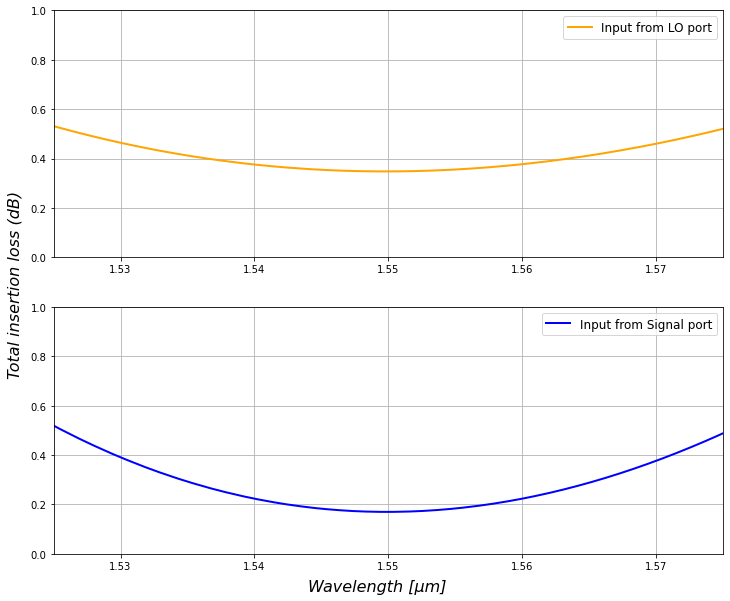

In [7]:
fig,axs = plt.subplots(2,1,figsize=(12,10))
fig.text(0.08, 0.5, 'Total insertion loss (dB)',fontsize = 16,fontstyle = 'oblique', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.08, 'Wavelength [μm]',fontsize = 16,fontstyle = 'oblique', ha='center', va='center')

axs[0].plot(1e6*lambd,IL_LO,linewidth = 2, color='orange', label = 'Input from LO port')
axs[0].set_xlim(1.525,1.575)
axs[0].set_ylim(0,1)
axs[0].legend(loc='upper right', fontsize=12.0)
axs[0].grid()

axs[1].plot(1e6*lambd,IL_SIG, linewidth = 2, color='blue',label = 'Input from Signal port')
axs[1].set_xlim(1.525,1.575)
axs[1].set_ylim(0,1)
axs[1].legend(loc='upper right', fontsize=12.0)
axs[1].grid()

## 2. Imbalance

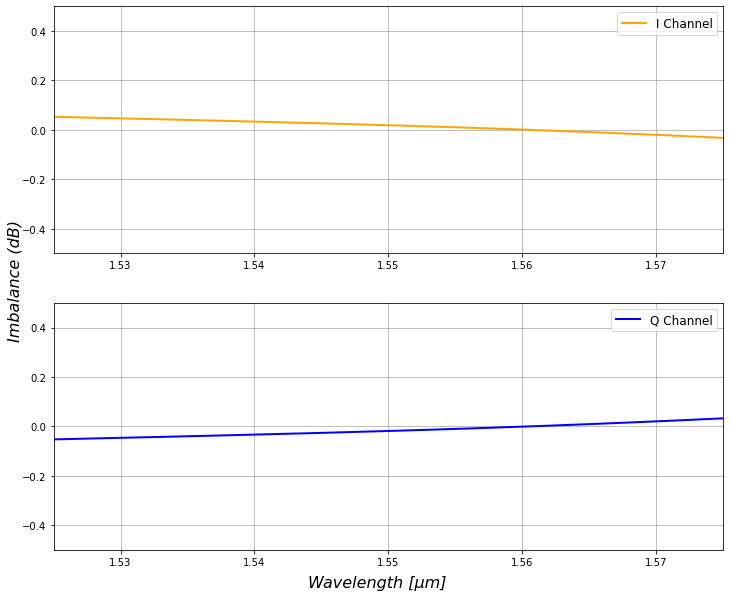

In [8]:
fig,axs = plt.subplots(2,1,figsize=(12,10))
fig.text(0.08, 0.5, 'Imbalance (dB)',fontsize = 16,fontstyle = 'oblique', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.08, 'Wavelength [μm]',fontsize = 16,fontstyle = 'oblique', ha='center', va='center')

axs[0].plot(1e6*lambd,Imb_I,linewidth = 2,color = 'orange',label = 'I Channel')
axs[0].set_xlim(1.525,1.575)
axs[0].set_ylim(-0.5,0.5)
axs[0].legend(loc='upper right', fontsize=12.0)
axs[0].grid()

axs[1].plot(1e6*lambd,Imb_Q,linewidth = 2,color = 'blue',label = 'Q Channel')
axs[1].set_xlim(1.525,1.575)
axs[1].set_ylim(-0.5,0.5)
axs[1].legend(loc='upper right', fontsize=12.0)
axs[1].grid()

## 3. CMRR

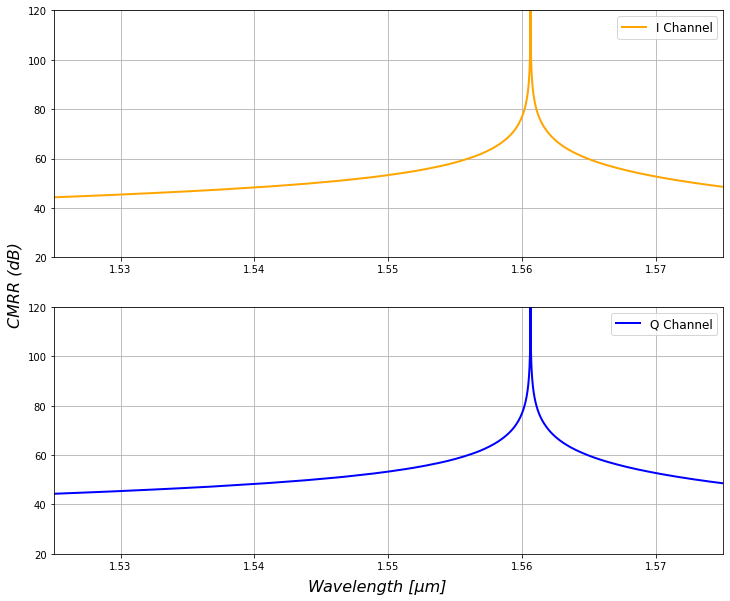

In [9]:
fig,axs = plt.subplots(2,1,figsize=(12,10))
fig.text(0.08, 0.5, 'CMRR (dB)',fontsize = 16,fontstyle = 'oblique', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.08, 'Wavelength [μm]',fontsize = 16,fontstyle = 'oblique', ha='center', va='center')

axs[0].plot(1e6*lambd,CMRR_I,linewidth = 2,color = 'orange',label = 'I Channel')
axs[0].set_xlim(1.525,1.575)
axs[0].set_ylim(20,120)
axs[0].legend(loc='upper right', fontsize=12.0)
axs[0].grid()

axs[1].plot(1e6*lambd,CMRR_Q,linewidth = 2,color = 'blue',label = 'Q Channel')
axs[1].set_xlim(1.525,1.575)
axs[1].set_ylim(20,120)
axs[1].legend(loc='upper right', fontsize=12.0)
axs[1].grid()

## 4. Phase error

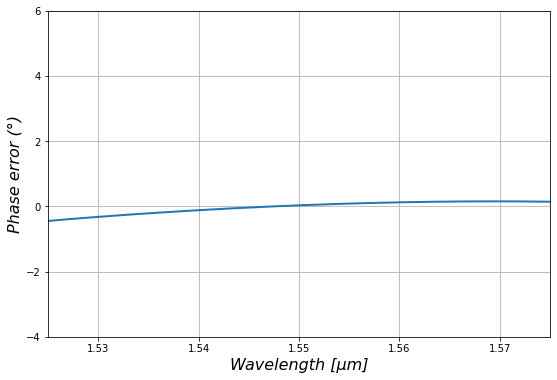

In [10]:
plt.figure(figsize=(9,6))
plt.plot(1e6*lambd, phase_error, linewidth=2)
plt.xlabel('Wavelength [μm]', fontsize=16.0, fontstyle='oblique')
plt.ylabel('Phase error (°)', fontsize=16.0, fontstyle='oblique')
plt.xlim([1.525,1.575])
plt.ylim([-4,6])
plt.grid();
plt.show();